# Inferring Photometric Redshifts from Multichannel Images
## Balázs Menkó (O67UT7)
### Supervisor: Pál, Balázs 

---

# Creating animation - [NGC 5681](https://en.wikipedia.org/wiki/Sloan_Digital_Sky_Survey)

In [1]:
from utils import *

from glob import glob
from functools import partial
from matplotlib.animation import FuncAnimation

def animation_function(frame, ax, img, zoom):
    ax.clear()
    ax.imshow(img[frame], aspect='equal', interpolation='none', interpolation_stage='data' )
    ax.set_title(f'zoom = {zoom[frame]:.3f}', fontsize=FS)
    ax.set_xticks([img[frame].shape[0]/2], [f'{RA:.3f}°'])
    ax.set_yticks([img[frame].shape[1]/2], [f'{DEC:.3f}°'], rotation=90)
    ax.get_yticklabels()[0].set_verticalalignment('center')
    return None

RA, DEC = 210.3255, 1.168552

SCALE_START = 1
SCALE_END = 0.1
FRAMES = 40
SIZE = 400
scale_parameters = np.logspace(np.log10(SCALE_START), np.log10(SCALE_END), FRAMES)

In [2]:
npy_file = f'gifs/npy_files/data_scale-log={SCALE_START}-{SCALE_END}_fr={FRAMES}_size={SIZE}px.npy' 

if npy_file in glob('gifs/npy_files/*'):
    print('Numpy file exists.', end=' ')
    images = np.load(npy_file)
    print('Numpy file loaded.')
else:
    print('Numpy file does not exists.')
    images=[]
    for scale in tqdm(scale_parameters, total=FRAMES, desc="Downloading pictures"):
        images.append(reshape_images(get_sdss_image(RA, DEC, scale, size=SIZE)))
    np.save(f'gifs/npy_files/data_scale-log={SCALE_START}-{SCALE_END}_fr={FRAMES}_size={SIZE}px.npy', np.array(images))
    print('Numpy file created and saved.')

Numpy file exists. Numpy file loaded.


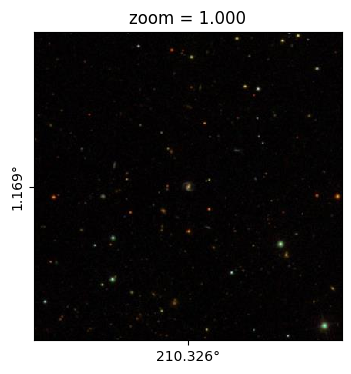

In [3]:
fig, ax = plt.subplots(figsize=(4,4))
ani = FuncAnimation(fig, partial(animation_function, ax=ax, img=images, zoom=scale_parameters),
                    frames=FRAMES, blit=False)
ani.save(f'gifs/scale-log={SCALE_START}-{SCALE_END}_fr={FRAMES}_size={SIZE}px.gif',
         writer='pillow', fps=FRAMES/3, dpi=300, bitrate=1e10)

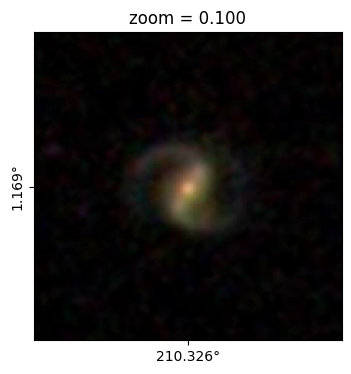

In [4]:
fig, ax = plt.subplots(figsize=(4,4))
animation_function(frame=-1, ax=ax, img=images, zoom=scale_parameters)